<a href="https://colab.research.google.com/github/kesantos2/EPSL/blob/main/AO_CO2_(Jan_23_31).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Raw Line Graph of All things**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Define folder path
folder_path = "/content/drive/MyDrive/2023 EPSL_SANTOS/03 - UP CARE/10 - Papers/P4 - CO2/AO - Jan 23 - 21 "
file_pattern = os.path.join(folder_path, "CO2 Measurements per date - *.csv")

# Get all matching files
files = glob.glob(file_pattern)

# Process each file
for file_path in files:
    df = pd.read_csv(file_path)

    # Ensure necessary columns exist
    if 'Date' not in df.columns or 'Time' not in df.columns:
        print(f"Skipping {file_path} due to missing Date or Time column")
        continue

    # Ensure Date and Time columns are strings
    df['Date'] = df['Date'].astype(str)
    df['Time'] = df['Time'].astype(str)

    # Combine Date and Time into a single datetime column
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

    # Check if Datetime column exists and drop NaN values
    if 'Datetime' in df.columns:
        df = df.dropna(subset=['Datetime'])
        df.set_index('Datetime', inplace=True)
    else:
        print(f"Skipping {file_path} due to Datetime parsing error")
        continue

    # Drop unnecessary columns
    sensor_columns = [col for col in df.columns if col not in ['Date', 'Time']]
    df[sensor_columns] = df[sensor_columns].apply(pd.to_numeric, errors='coerce')
    df = df[sensor_columns]

    # Drop rows with all NaN values in sensor data
    df = df.dropna(how='all')

    # Extract date and day
    date_obj = pd.to_datetime(df.index[0]).strftime('%B %d, %Y (%A)') if not df.empty else "Unknown Date"

    # Plot the data if there is valid data
    if not df.empty:
        plt.figure(figsize=(12, 6))
        for sensor in df.columns:
            plt.plot(df.index, df[sensor], label=f'Sensor {sensor}')

        plt.xlabel('Time')
        plt.ylabel('CO2 Levels')
        plt.title(f'CO2 Measurements Over Time ({date_obj})')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()


# **Line Graph acc to work hours ( 7 am to 5 pm )**

<ipython-input-4-3232503ad22e>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


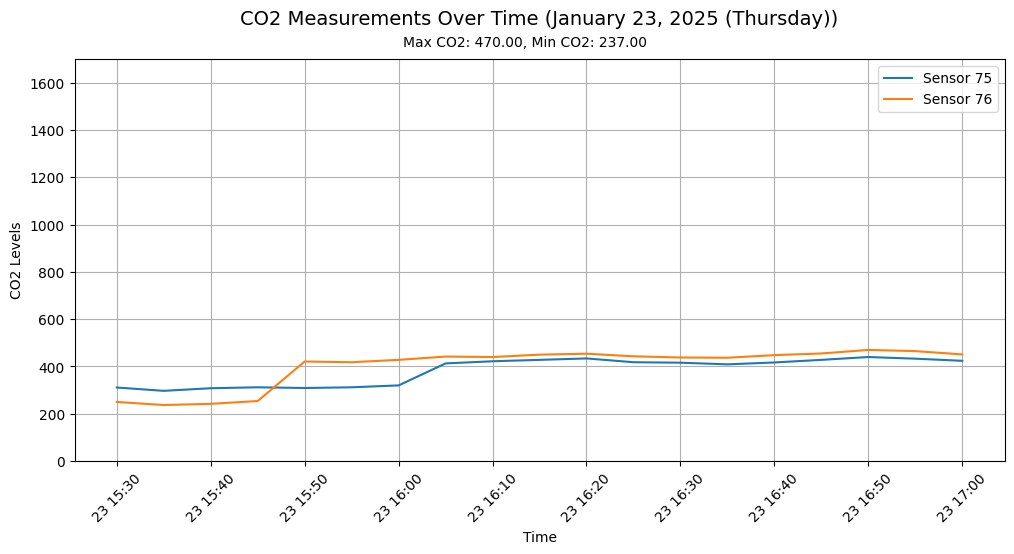

<ipython-input-4-3232503ad22e>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


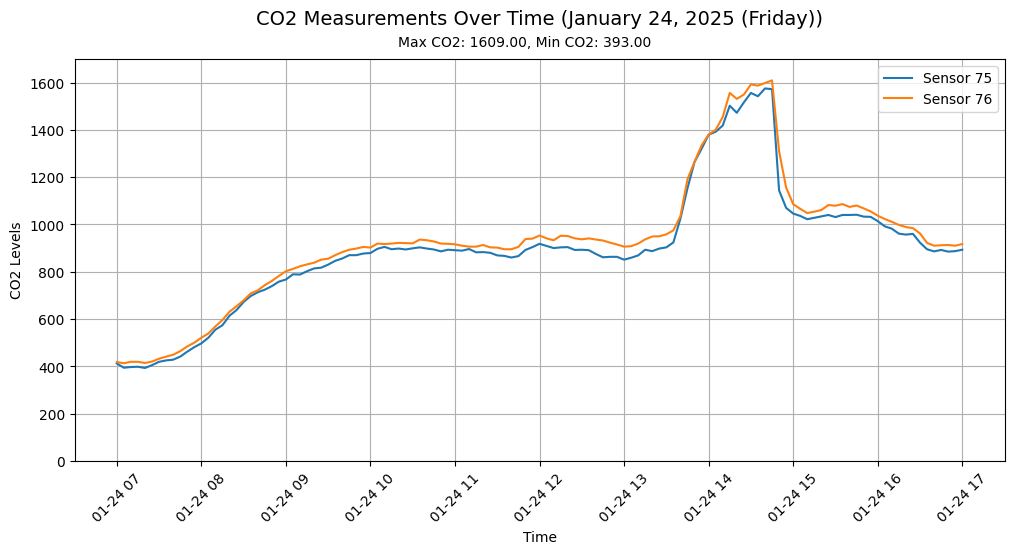

<ipython-input-4-3232503ad22e>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


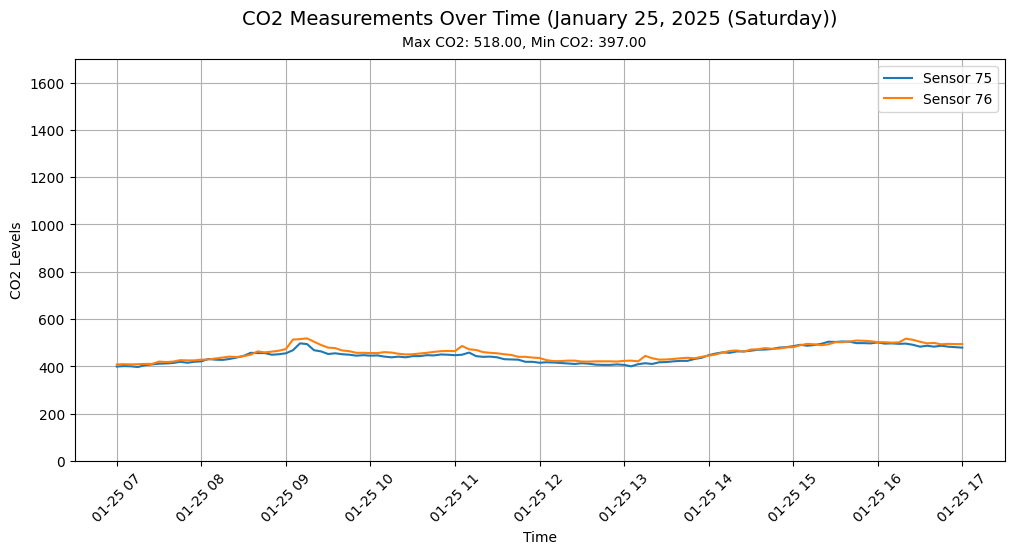

<ipython-input-4-3232503ad22e>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


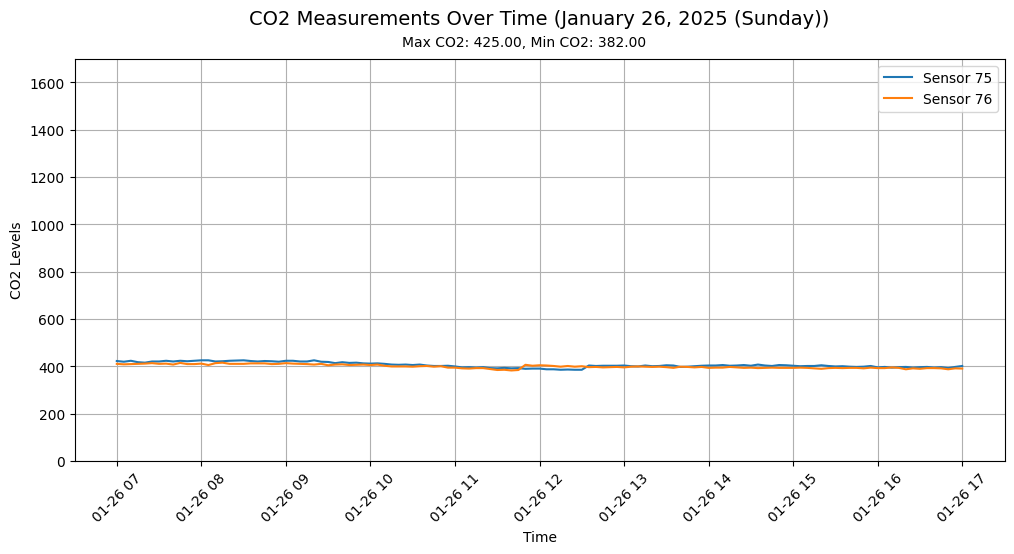

<ipython-input-4-3232503ad22e>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


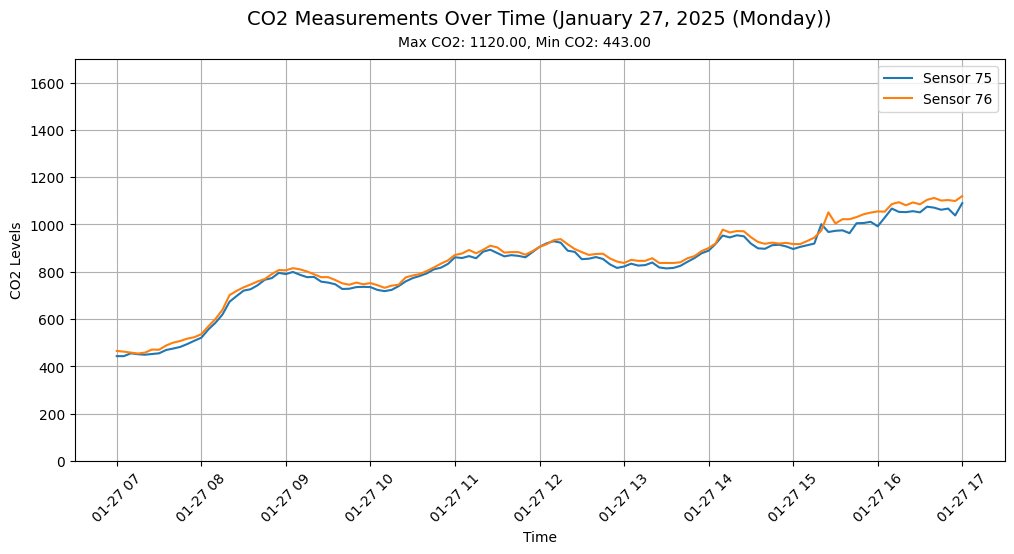

<ipython-input-4-3232503ad22e>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


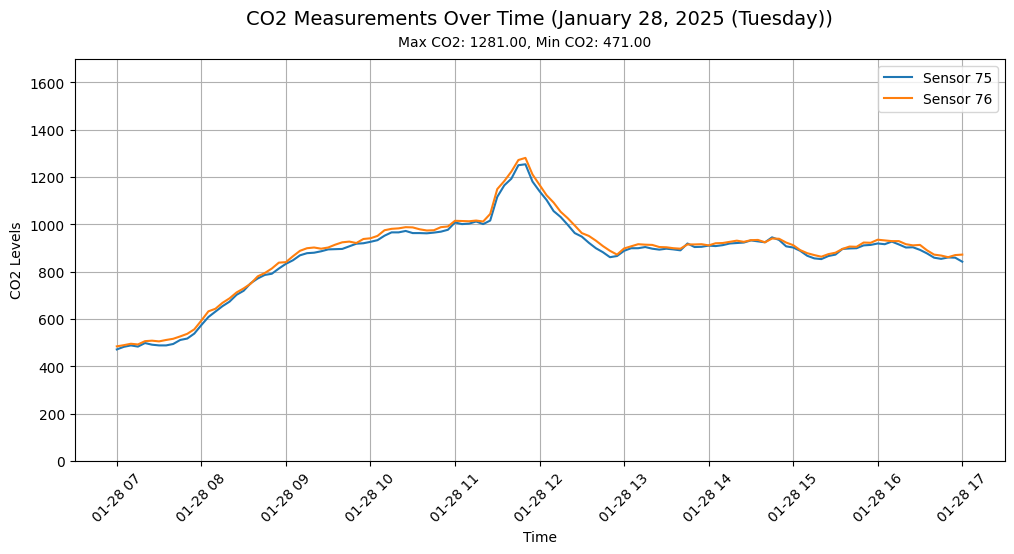

<ipython-input-4-3232503ad22e>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


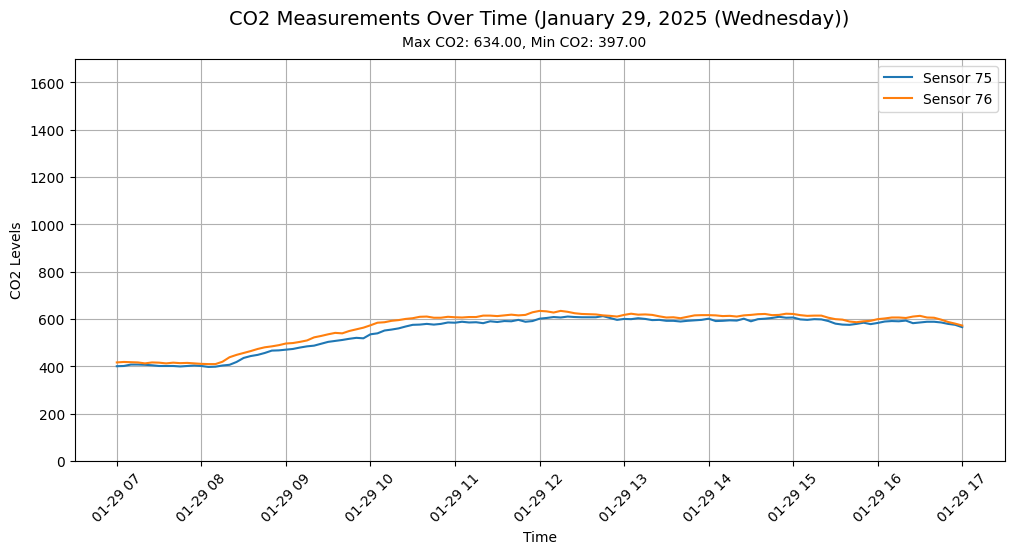

<ipython-input-4-3232503ad22e>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


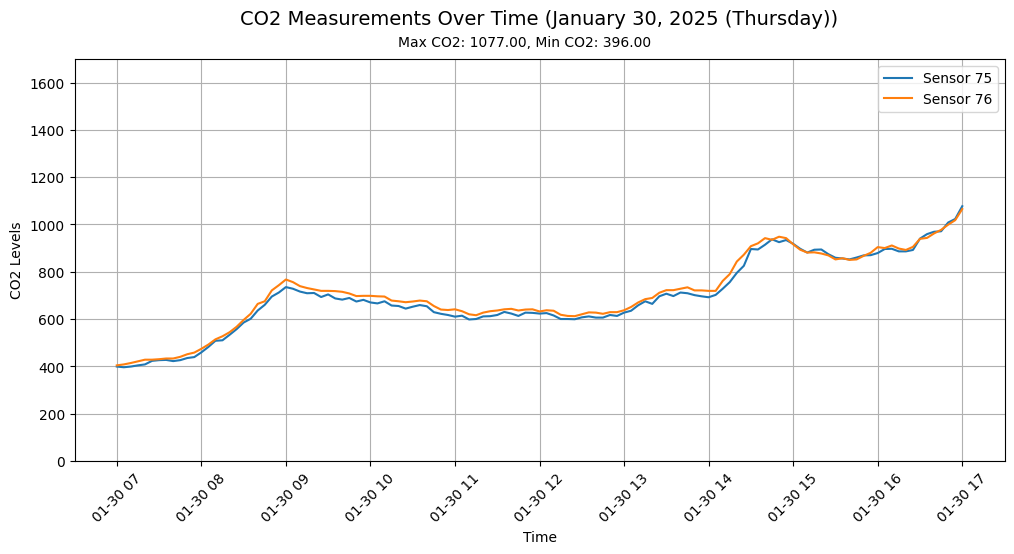

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Define folder path
folder_path = "/content/drive/MyDrive/2023 EPSL_SANTOS/03 - UP CARE/10 - Papers/P4 - CO2/AO - Jan 23 - 21"
file_pattern = os.path.join(folder_path, "CO2 Measurements per date - *.csv")

# Get all matching files
files = glob.glob(file_pattern)

# Process each file
for file_path in files:
    df = pd.read_csv(file_path)

    # Ensure necessary columns exist
    if 'Date' not in df.columns or 'Time' not in df.columns:
        print(f"Skipping {file_path} due to missing Date or Time column")
        continue

    # Ensure Date and Time columns are strings
    df['Date'] = df['Date'].astype(str)
    df['Time'] = df['Time'].astype(str)

    # Combine Date and Time into a single datetime column
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

    # Check if Datetime column exists and drop NaN values
    if 'Datetime' in df.columns:
        df = df.dropna(subset=['Datetime'])
        df.set_index('Datetime', inplace=True)
    else:
        print(f"Skipping {file_path} due to Datetime parsing error")
        continue

    # Convert index to time-based filtering
    df = df.between_time('07:00', '17:00')  # Filter for office hours (7 AM - 5 PM)

    # Drop unnecessary columns
    sensor_columns = [col for col in df.columns if col not in ['Date', 'Time']]
    df[sensor_columns] = df[sensor_columns].apply(pd.to_numeric, errors='coerce')
    df = df[sensor_columns]

    # Drop rows with all NaN values in sensor data
    df = df.dropna(how='all')

    # Extract date and day
    date_obj = pd.to_datetime(df.index[0]).strftime('%B %d, %Y (%A)') if not df.empty else "Unknown Date"

    # Calculate min and max values
    min_value = df.min().min() if not df.empty else None
    max_value = df.max().max() if not df.empty else None

    # Plot the data if there is valid data
    if not df.empty:
        plt.figure(figsize=(12, 6))

        for sensor in df.columns:
            plt.plot(df.index, df[sensor], label=f'Sensor {sensor}')

        plt.xlabel('Time')
        plt.ylabel('CO2 Levels')
        plt.ylim(0, 1700)  # Set y-axis limit

        # Set title with extra padding
        plt.title(f'CO2 Measurements Over Time ({date_obj})', fontsize=14, pad=25)

        # Add min/max CO2 as a separate text below the title
        plt.figtext(0.5, 0.82, f'Max CO2: {max_value:.2f}, Min CO2: {min_value:.2f}',
                    fontsize=10, ha='center', va='top')

        # Adjust layout to prevent overlapping
        plt.subplots_adjust(top=0.78)  # Move plot area slightly down

        plt.legend()
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()


# **Sensor Correlation Matrix**


> Are all sensors capturing similar trends, or do some behave differently?



<ipython-input-5-aeb707d70bac>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
<ipython-input-5-aeb707d70bac>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
<ipython-input-5-aeb707d70bac>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
<ipython-input-5-aeb707d70bac>:27: UserWarning: Could not infer format, so each element will be p

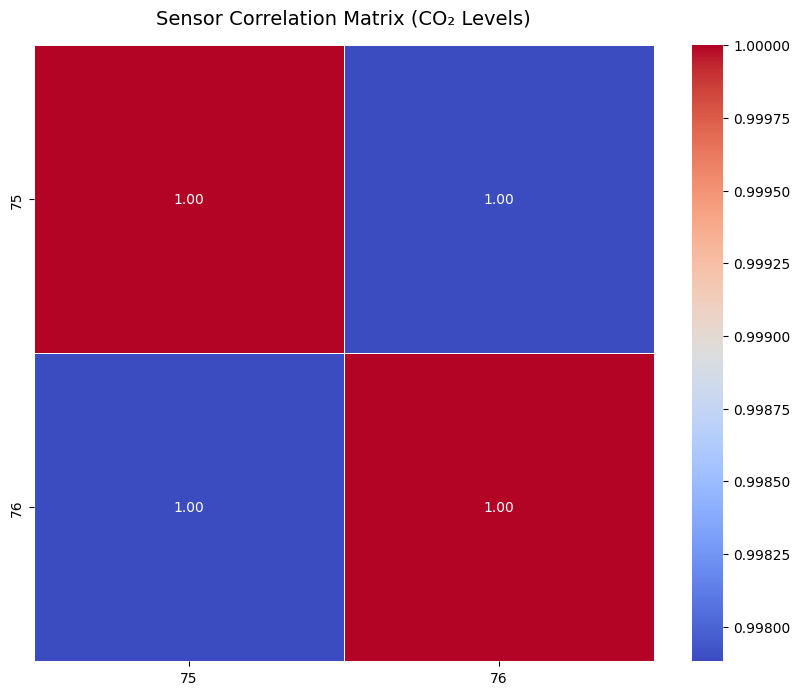

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Define folder path
folder_path = "/content/drive/MyDrive/2023 EPSL_SANTOS/03 - UP CARE/10 - Papers/P4 - CO2/AO - Jan 23 - 21"
file_pattern = os.path.join(folder_path, "CO2 Measurements per date - *.csv")

# Get all matching files
files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
df_list = []

# Process each file
for file_path in files:
    df = pd.read_csv(file_path)

    # Ensure necessary columns exist
    if 'Date' not in df.columns or 'Time' not in df.columns:
        print(f"Skipping {file_path} due to missing Date or Time column")
        continue

    # Combine Date and Time into a single datetime column
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

    # Drop NaN values from datetime parsing
    df = df.dropna(subset=['Datetime'])
    df.set_index('Datetime', inplace=True)

    # Filter data for office hours (7 AM - 5 PM)
    df = df.between_time('07:00', '17:00')

    # Identify potential sensor columns (numeric only)
    sensor_columns = [col for col in df.columns if col not in ['Date', 'Time']]

    # Convert sensor columns to numeric, forcing errors to NaN
    df[sensor_columns] = df[sensor_columns].apply(pd.to_numeric, errors='coerce')

    # Drop rows with all NaN values in sensor data
    df = df.dropna(how='all')

    # Append to list if not empty
    if not df.empty:
        df_list.append(df)

# Combine all dataframes if there are multiple files
if df_list:
    combined_df = pd.concat(df_list)
else:
    print("No valid data found.")
    exit()

# Ensure we only use numeric columns for correlation analysis
numeric_cols = combined_df.select_dtypes(include=['number']).columns
correlation_matrix = combined_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Title
plt.title("Sensor Correlation Matrix (CO₂ Levels)", fontsize=14, pad=15)
plt.show()


## **Correlation Value	Meaning**

* **+1.0**	Perfect Positive Correlation (both sensors behave identically).
* **0.7 - 0.99**	Strong Positive Correlation (sensors show similar trends).
* **0.3 - 0.69**	Moderate Positive Correlation (some similarity but not perfect).
* **0.0 - 0.29**	Weak or No Correlation (sensors are independent).
* **-0.3 to -0.99**	Negative Correlation (when one increases, the other decreases).

# **CO₂ Distribution Analysis**

<ipython-input-6-cda9647d18bd>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
<ipython-input-6-cda9647d18bd>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
<ipython-input-6-cda9647d18bd>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
<ipython-input-6-cda9647d18bd>:27: UserWarning: Could not infer format, so each element will be p

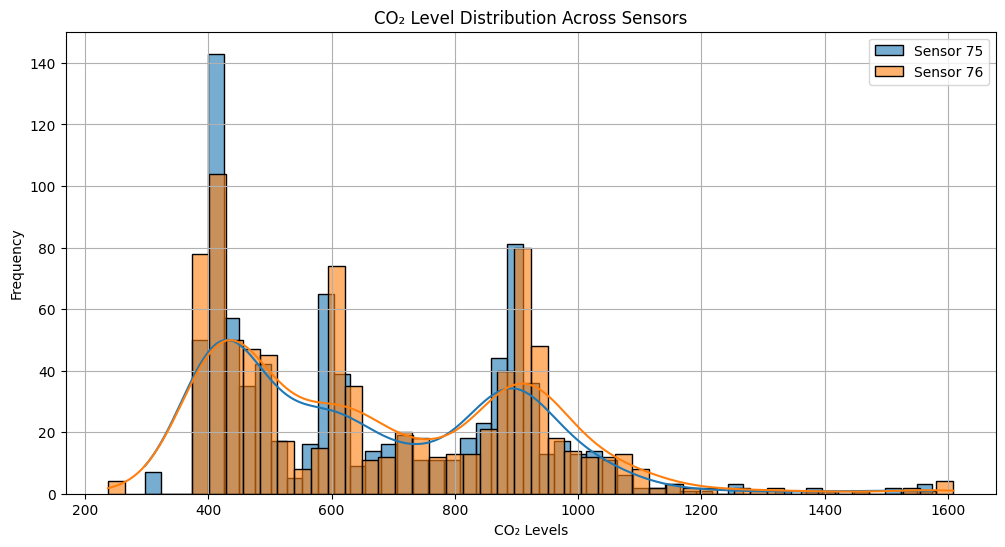

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Define folder path
folder_path = "/content/drive/MyDrive/2023 EPSL_SANTOS/03 - UP CARE/10 - Papers/P4 - CO2/AO - Jan 23 - 21"
file_pattern = os.path.join(folder_path, "CO2 Measurements per date - *.csv")

# Get all matching files
files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
df_list = []

# Process each file
for file_path in files:
    df = pd.read_csv(file_path)

    # Ensure necessary columns exist
    if 'Date' not in df.columns or 'Time' not in df.columns:
        print(f"Skipping {file_path} due to missing Date or Time column")
        continue

    # Combine Date and Time into a single datetime column
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

    # Drop NaN values from datetime parsing
    df = df.dropna(subset=['Datetime'])
    df.set_index('Datetime', inplace=True)

    # Filter data for office hours (7 AM - 5 PM)
    df = df.between_time('07:00', '17:00')

    # Identify potential sensor columns (numeric only)
    sensor_columns = [col for col in df.columns if col not in ['Date', 'Time']]

    # Convert sensor columns to numeric, forcing errors to NaN
    df[sensor_columns] = df[sensor_columns].apply(pd.to_numeric, errors='coerce')

    # Drop rows with all NaN values in sensor data
    df = df.dropna(how='all')

    # Append to list if not empty
    if not df.empty:
        df_list.append(df)

# Combine all dataframes if there are multiple files
if df_list:
    combined_df = pd.concat(df_list)
else:
    print("No valid data found.")
    exit()

# Ensure we only use numeric columns
numeric_cols = combined_df.select_dtypes(include=['number']).columns
filtered_df = combined_df[numeric_cols]

# Create a histogram for CO₂ level distribution
plt.figure(figsize=(12, 6))
for sensor in filtered_df.columns:
    sns.histplot(filtered_df[sensor], bins=50, kde=True, label=f'Sensor {sensor}', alpha=0.6)

plt.xlabel("CO₂ Levels")
plt.ylabel("Frequency")
plt.title("CO₂ Level Distribution Across Sensors")
plt.legend()
plt.grid()
plt.show()


**1️⃣ Most Common CO₂ Levels (~400-600 ppm)**


1.   The highest bars (~400-600 ppm) indicate that most CO₂ levels fall within this range for both sensors.
2.   This suggests that the environment is generally well-ventilated most of the time.



**2️⃣ Multiple Peaks (Bimodal/Multimodal Distribution)**
Instead of a single peak, the data shows several spikes, meaning the CO₂ levels fluctuate between different stable levels.

`Some possible causes:`
*   Different occupancy levels (e.g., empty office vs. full meeting room).
*   Variations in HVAC system performance.
*   Changes in outdoor airflow affecting indoor CO₂.


**3️⃣ Higher CO₂ Spikes (~1000+ ppm)**
*  Both sensors show significant frequencies of CO₂ levels above 1000 ppm.
*  These spikes suggest periodic poor ventilation or high occupancy in certain conditions.
*  If these peaks happen at specific times, they may correspond to meeting hours or times when ventilation is reduced.

**4️⃣ Sensor 76 (Orange) Shows a Slightly Wider Spread**
*  The KDE curve for Sensor 76 appears more spread out, meaning more variation in CO₂ levels compared to Sensor 75.

This could indicate:

> Sensor 76 is placed closer to a CO₂ source (e.g., near a conference room or crowded space).
> Differences in ventilation efficiency between sensor locations.

**5️⃣ Outliers Above 1400 ppm**
*  There are very high CO₂ readings (1400-1600 ppm), though they are infrequent.

**Potential causes:**
*  Periods of extreme crowding (e.g., a closed meeting room with many people).
*  Poor ventilation at specific times.


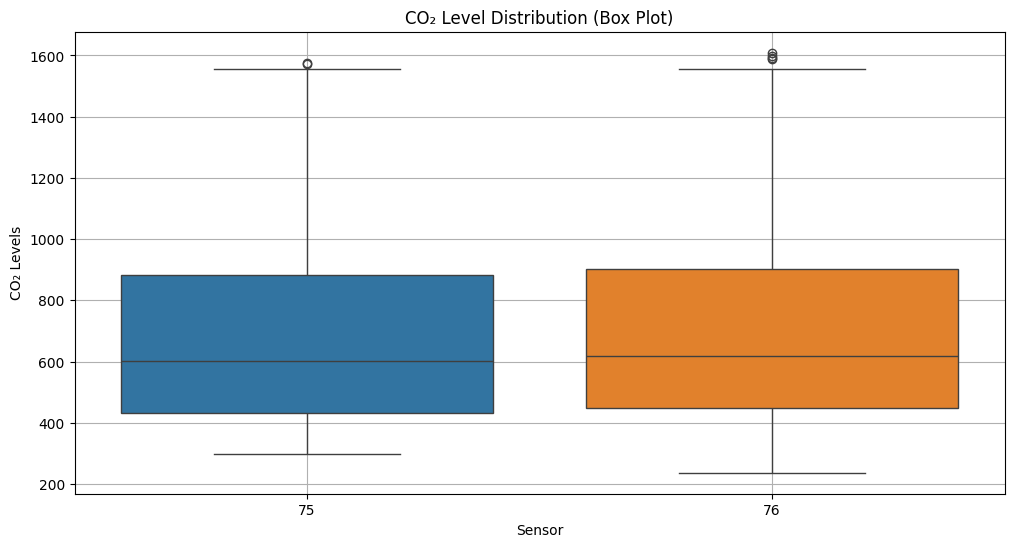

In [7]:
# Create a box plot to visualize sensor CO₂ distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df)

plt.xlabel("Sensor")
plt.ylabel("CO₂ Levels")
plt.title("CO₂ Level Distribution (Box Plot)")
plt.grid()
plt.show()

**1️⃣ Median (Q2) - Center Line of the Box**
* Sensor 75: Median CO₂ level is around 600 ppm.
* Sensor 76: Median CO₂ level is also around 600 ppm.
> This means that half of the recorded CO₂ values are below 600 ppm, while the other half is above.

**2️⃣ Interquartile Range (IQR) - Width of the Box**
* The box represents the middle 50% of CO₂ values (Q1 to Q3).
* Sensor 75 has a slightly smaller IQR than Sensor 76, meaning its CO₂ values are less variable.
* Sensor 76's IQR is wider, suggesting it experiences more fluctuations.

**3️⃣ Whiskers (Range of Normal Values)**
* The whiskers extend to the minimum and maximum "normal" values (excluding outliers).
* Both sensors have wide whiskers, meaning they experience a broad range of CO₂ levels.

**4️⃣ Outliers (Dots Above Whiskers)**
* Both sensors have CO₂ outliers above 1600 ppm.
* These extreme values indicate:

**Possible periods of poor ventilation.**
* Crowded conditions in the area where these sensors are located.
* Temporary CO₂ build-ups (e.g., during meetings or low airflow periods).